# Linear Algebra Fundamentals for Machine Learning

## 1. Introduction

Linear algebra provides the foundation for many machine learning algorithms. It allows us to represent data and operations compactly.

Key concepts include:
- Representing data as vectors and matrices
- Performing transformations
- Solving systems of equations
- Computing gradients for optimisation

We will use `numpy`, `matplotlib`, and `sympy` for this notebook.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sympy import symbols, diff, lambdify

## 2. Scalars, Vectors, and Notation

A **scalar** is a single number. A **vector** is an ordered list of numbers (magnitude and direction). Vectors are commonly used to represent data points or weights.


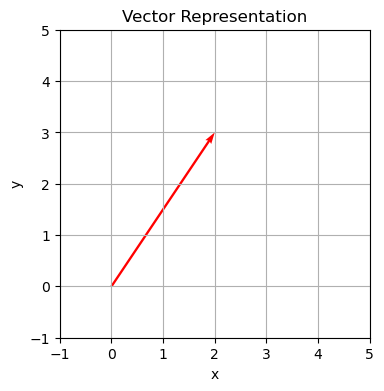

v1 + v2 = [4 3]
Dot product v1·v2 = 5
Norm of v1 = 2.23606797749979


In [4]:
# Scalar
scalar = 5

# Vector
vector = np.array([2, 3])

# Plot vector
plt.figure(figsize=(4,4))
plt.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, color='r')
plt.xlim(-1, 5)
plt.ylim(-1, 5)
plt.grid()
plt.title("Vector Representation")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# Vector operations
v1 = np.array([1, 2])
v2 = np.array([3, 1])

print("v1 + v2 =", v1 + v2)
print("Dot product v1·v2 =", np.dot(v1, v2))
print("Norm of v1 =", np.linalg.norm(v1))

## 3. Matrices

A **matrix** is a 2D array of numbers. In machine learning, matrices often represent datasets or transformations.


Matrix:
 [[1 2]
 [3 4]]
Shape: (2, 2)
Transpose:
 [[1 3]
 [2 4]]


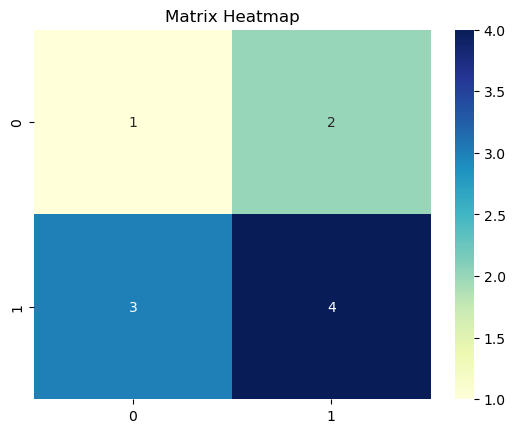

In [5]:
matrix = np.array([[1, 2], [3, 4]])
print("Matrix:\n", matrix)
print("Shape:", matrix.shape)
print("Transpose:\n", matrix.T)

# Visualise matrix as heatmap
sns.heatmap(matrix, annot=True, cmap="YlGnBu")
plt.title("Matrix Heatmap")
plt.show()

## 4. Matrix Operations

You can perform addition, subtraction, and scalar multiplication on matrices element-wise, as long as their dimensions match.


In [6]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

print("A + B =\n", A + B)
print("A - B =\n", A - B)
print("A * 2 =\n", A * 2)

A + B =
 [[ 6  8]
 [10 12]]
A - B =
 [[-4 -4]
 [-4 -4]]
A * 2 =
 [[2 4]
 [6 8]]


## 5. Matrix Multiplication

Matrix multiplication is a fundamental operation. It's **not** element-wise and only works when the number of columns in the first matrix equals the number of rows in the second.


A dot B =
 [[19 22]
 [43 50]]


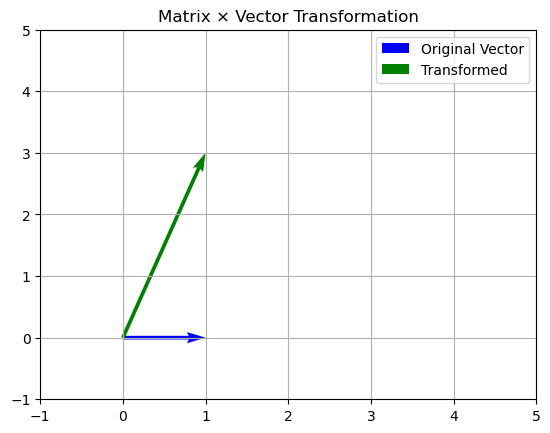

In [7]:
C = np.dot(A, B)
print("A dot B =\n", C)

# Visual: matrix-vector product
v = np.array([1, 0])
result = np.dot(A, v)

plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='blue', label='Original Vector')
plt.quiver(0, 0, result[0], result[1], angles='xy', scale_units='xy', scale=1, color='green', label='Transformed')
plt.xlim(-1, 5)
plt.ylim(-1, 5)
plt.grid()
plt.legend()
plt.title("Matrix × Vector Transformation")
plt.show()

## 6. Matrix as a Transformation

A matrix transforms a vector by modifying its direction and magnitude based on how it acts on the vector's components. You can think of a 2×2 matrix as transforming the 2D space itself:

- It sends the x-axis unit vector `[1, 0]` to a new vector (the first column of the matrix)
- It sends the y-axis unit vector `[0, 1]` to another new vector (the second column of the matrix)

When a matrix `A` is applied to a vector `x`, it's essentially re-expressing `x` in a new coordinate system defined by the columns of `A`. This is why matrix multiplication can rotate, stretch, or shear a vector.


A matrix transforms a vector by modifying its direction and magnitude based on how it acts on the vector's components. You can think of a 2×2 matrix as transforming the 2D space itself:

- It sends the x-axis unit vector \([1, 0]\) to a new vector (first column of the matrix)
- It sends the y-axis unit vector \([0, 1]\) to another new vector (second column of the matrix)

When a matrix \( A \) is applied to a vector \( 	extbf{x} \), it's essentially re-expressing \( 	extbf{x} \) in a new coordinate system defined by the columns of \( A \). This is why matrix multiplication can rotate, stretch, or shear a vector.


When you multiply a matrix by a vector, you are applying a **linear transformation** to that vector.

Let’s say we have:
$$
A = \begin{bmatrix} 2 & 0 \\ 0 & 1 \end{bmatrix}, \quad \textbf{x} = \begin{bmatrix} 1 \\ 1 \end{bmatrix}
$$

Then:

$$
A \cdot \textbf{x} = \begin{bmatrix} 2 \\ 1 \end{bmatrix}
$$

This means:
- The **x-component** of the vector is scaled (stretched)
- The **y-component** stays the same

This is a **horizontal stretch** — a simple example of how a matrix transforms a vector.


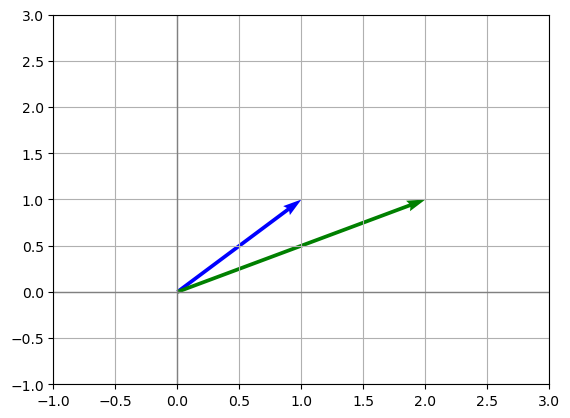

In [8]:
A = np.array([[2, 0], [0, 1]])
x = np.array([1, 1])
y = A @ x

plt.quiver(0, 0, x[0], x[1], angles='xy', scale_units='xy', scale=1, color='blue', label='Original x')
plt.quiver(0, 0, y[0], y[1], angles='xy', scale_units='xy', scale=1, color='green', label='Transformed y = A·x')

plt.xlim(-1, 3)
plt.ylim(-1, 3)
plt.axhline(0, color='gray', lw=1)
plt.axvline(0, color='gray', lw=1)
plt.grid()

## 7. Determinant and Inverse

The **determinant** of a matrix gives us insight into how a transformation scales space:

- If $\det(A) = 0$: transformation collapses space (e.g. 2D to a line), not invertible
- If $\det(A) \neq 0$: transformation preserves dimensionality and is invertible
- $|\det(A)|$: represents the **area (2D)** or **volume (3D)** scaling factor

A matrix's **inverse** $A^{-1}$ undoes the transformation done by $A$ — but only if the determinant is not zero.

Matrix inversion is used in the normal equation for linear regression to solve for the optimal weights $\theta$:

$\theta = (X^T X)^{-1} X^T y$

This gives the best-fit line analytically when $(X^T X)$ is invertible.

### 7.1 Example: Area Scaling

Let’s transform a unit square using matrix $A = \begin{bmatrix} 2 & 0 \\ 0 & 1 \end{bmatrix}$:

In [15]:
M = np.array([[2, 1], [1, 3]])

det = np.linalg.det(M)
print("Determinant:", det)

if det != 0:
    inv = np.linalg.inv(M)
    print("Inverse:\n", inv)
else:
    print("Matrix is not invertible")

Determinant: 5.000000000000001
Inverse:
 [[ 0.6 -0.2]
 [-0.2  0.4]]


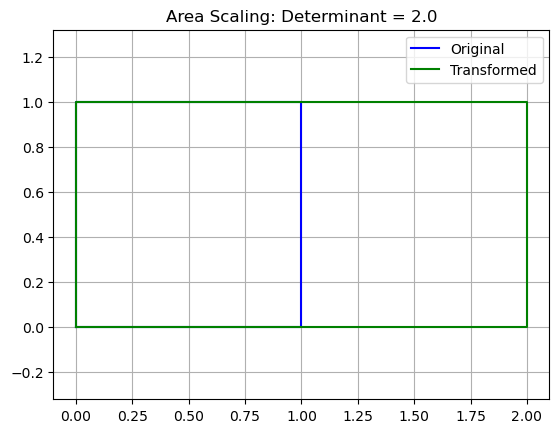

In [16]:
A = np.array([[2, 0], [0, 1]])

square = np.array([[0, 1, 1, 0, 0], [0, 0, 1, 1, 0]])
transformed = A @ square

plt.plot(square[0], square[1], 'b-', label='Original')
plt.plot(transformed[0], transformed[1], 'g-', label='Transformed')
plt.axis('equal')
plt.grid()
plt.legend()
plt.title('Area Scaling: Determinant = {:.1f}'.format(np.linalg.det(A)))
plt.show()

### 7.2 ML Use Case: Multivariate Gaussian Log-Likelihood

In probabilistic ML (e.g. Gaussian models, normalising flows), the log-determinant of the covariance matrix appears in likelihood calculations:

$$
\log p(x) = -\frac{1}{2} \left[ (x - \mu)^T \Sigma^{-1} (x - \mu) + \log \det(\Sigma) + d \log(2\pi) \right]
$$

In [13]:
from numpy.linalg import det, inv

mu = np.array([0, 0])
x = np.array([1, 1])
Sigma = np.array([[2, 0.5], [0.5, 1]])

Sigma_inv = inv(Sigma)
d = len(mu)

term1 = (x - mu).T @ Sigma_inv @ (x - mu)
term2 = np.log(det(Sigma))
log_prob = -0.5 * (term1 + term2 + d * np.log(2 * np.pi))

print("Log-likelihood of x under N(mu, Sigma):", log_prob)

Log-likelihood of x under N(mu, Sigma): -2.689113531805628


### 7.3 Basic Code Example

In [14]:
M = np.array([[2, 1], [1, 3]])

det = np.linalg.det(M)
print("Determinant:", det)

if det != 0:
    inv = np.linalg.inv(M)
    print("Inverse:\n", inv)
else:
    print("Matrix is not invertible")

Determinant: 5.000000000000001
Inverse:
 [[ 0.6 -0.2]
 [-0.2  0.4]]


## 8. Solving Systems of Linear Equations

Solving a linear system means finding a vector $\mathbf{x}$ that satisfies the matrix equation:

$$
A \cdot \mathbf{x} = \mathbf{b}
$$

This is central to many problems in machine learning, such as solving for model parameters in a closed-form solution.

If $A$ is invertible, the solution is:

$$
\mathbf{x} = A^{-1} \cdot \mathbf{b}
$$

In practice, we don’t compute the inverse explicitly — we use a direct solver like np.linalg.solve(A, b).

In [18]:
import numpy as np

# Define system Ax = b
A = np.array([[2, 1],
              [1, 3]])
b = np.array([8, 13])

# Solve for x
x = np.linalg.solve(A, b)

# Output
print("Solution x:", x)

# Verify A @ x == b
print("A @ x =", A @ x)
print("Original b =", b)

Solution x: [2.2 3.6]
A @ x = [ 8. 13.]
Original b = [ 8 13]


## 9. Gradients in Machine Learning

n machine learning, we often try to minimise a loss function — a measure of how wrong our model is. To do this, we use the gradient of the loss with respect to the model’s parameters.

**What is a Gradient?**

The gradient is a vector of partial derivatives:

$$
\nabla L(\theta) = \left[ \frac{\partial L}{\partial \theta_1}, \frac{\partial L}{\partial \theta_2}, \dots, \frac{\partial L}{\partial \theta_n} \right]
$$

It tells us how to adjust each parameter $\theta_i$ to reduce the loss.

In gradient descent, we update parameters like this:

$$
\theta \leftarrow \theta - \eta \cdot \nabla L(\theta)
$$

Where:
- $\theta$ = model parameters
- $\eta$ = learning rate
- $\nabla L(\theta)$ = gradient of the loss

This is how neural networks and many other models learn.


### Example: Gradient of a Loss Function

Let’s say we have a very simple loss function:

$$
L(w, b) = (wx + b - y)^2
$$

This is the squared error for a linear model predicting $y$ from $x$.

In [20]:
from sympy import symbols, diff, lambdify

# Define symbols
w, b, x, y = symbols('w b x y')  # create symbolic variables w (weight), b (bias), x (features), y (target)

# Define loss function
L = (w*x + b - y)**2

# Compute gradients
dL_dw = diff(L, w)
dL_db = diff(L, b)

# Convert to numerical functions
grad_w = lambdify((w, b, x, y), dL_dw)
grad_b = lambdify((w, b, x, y), dL_db)

# Evaluate gradients at a point
example = {
    'w': 1.0,
    'b': 0.0,
    'x': 2.0,
    'y': 4.0
}
grad = [grad_w(**example), grad_b(**example)]
# grad

In [21]:
grad

[-8.0, -4.0]

### Visual: 3D Loss Surface + Gradient Vector

#### What Are Symbolic Variables?

Symbolic variables are variables that represent mathematical expressions instead of specific numerical values.

They’re used in symbolic computation, which means manipulating math formulas algebraically — just like you would by hand.

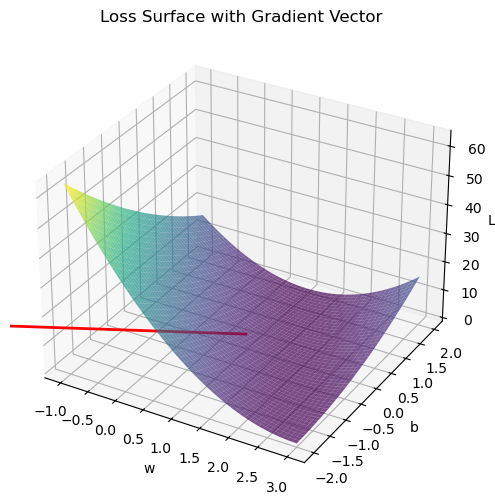

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the loss function L(w, b) = (wx + b - y)^2 for fixed x and y
x_val = 2.0
y_val = 4.0

def loss(w, b):
    return (w * x_val + b - y_val) ** 2

# Generate a grid of w and b values
w_vals = np.linspace(-1, 3, 50)
b_vals = np.linspace(-2, 2, 50)
W, B = np.meshgrid(w_vals, b_vals)
Z = loss(W, B)

# Compute gradient at (w=1.0, b=0.0)
w0, b0 = 1.0, 0.0
dL_dw_val = 2 * (w0 * x_val + b0 - y_val) * x_val
dL_db_val = 2 * (w0 * x_val + b0 - y_val)

# Plot the loss surface
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W, B, Z, cmap='viridis', alpha=0.7)

# Plot the point and gradient arrow
L0 = loss(w0, b0)
ax.quiver(w0, b0, L0, dL_dw_val, dL_db_val, 0.5, color='red', linewidth=2)

ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss')
ax.set_title('Loss Surface with Gradient Vector')
plt.show()

## 10. Eigenvalues and Eigenvectors

Eigenvalues and eigenvectors describe how a matrix transforms space in specific directions.

Given a square matrix $A$ and a non-zero vector $\mathbf{v}$:

$$
A \cdot \mathbf{v} = \lambda \cdot \mathbf{v}
$$
- $\mathbf{v}$ is an eigenvector of $A$
- $\lambda$ is the eigenvalue associated with $\mathbf{v}$

In simple terms, applying $A$ to $\mathbf{v}$ only scales it by $\lambda$, without changing its direction.

### For Machine Learning

Eigenvalues and eigenvectors are used in:
- Principal Component Analysis (PCA): identify directions of maximum variance
- Stability analysis in dynamical systems
- Spectral clustering and graph-based learning
- Optimising quadratic forms

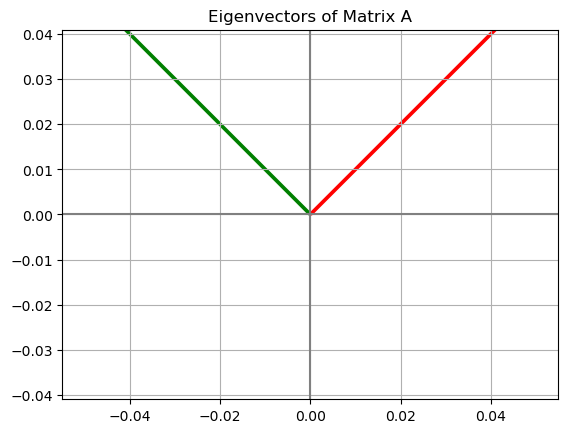

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Define matrix
A = np.array([[3, 1],
              [1, 3]])

# Compute eigenvalues and eigenvectors
values, vectors = np.linalg.eig(A)

# Eigenvalues
# values

# Eigenvectors (each column is an eigenvector)
# vectors

# Visualise the eigenvectors
origin = np.zeros((2, 2))  # two vectors from origin
plt.quiver(*origin, vectors[0], vectors[1], angles='xy', scale_units='xy', scale=1, color=['red', 'green'])
plt.grid()
plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.title('Eigenvectors of Matrix A')
plt.axis('equal')
plt.show()

In [24]:
values, vectors

(array([4., 2.]),
 array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

## 11. Principal Component Analysis (PCA)

PCA is a dimensionality reduction technique that finds the directions (called principal components) in which the data varies the most.

These directions are given by the eigenvectors of the data’s covariance matrix. The corresponding eigenvalues indicate how much variance is captured by each component.

### Why PCA Matters in ML
- Reduces data dimensionality while preserving as much variance as possible
- Helps visualise high-dimensional data
- Often used as a preprocessing step before training models

### Steps of PCA
1. Standardise the data
1. Compute the covariance matrix
1. Compute eigenvalues and eigenvectors
1. Project data onto the top eigenvectors (principal components)

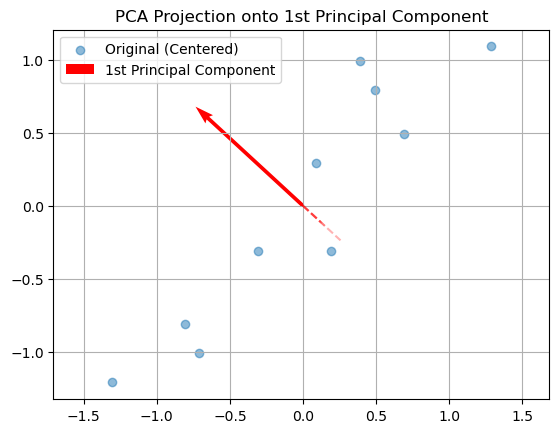

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Sample 2D data
X = np.array([[2.5, 2.4],
              [0.5, 0.7],
              [2.2, 2.9],
              [1.9, 2.2],
              [3.1, 3.0],
              [2.3, 2.7],
              [2.0, 1.6],
              [1.0, 1.1],
              [1.5, 1.6],
              [1.1, 0.9]])

# Step 1: Center the data
X_meaned = X - np.mean(X, axis=0)

# Step 2: Compute covariance matrix
cov_matrix = np.cov(X_meaned.T)

# Step 3: Eigen decomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 4: Project onto first principal component
pc1 = eigenvectors[:, 0]  # first principal component
X_pca = X_meaned @ pc1.reshape(-1, 1)

# Visualise
plt.scatter(X_meaned[:, 0], X_meaned[:, 1], alpha=0.5, label='Original (Centered)')
for point in X_pca:
    projected = point * pc1
    plt.plot([0, projected[0]], [0, projected[1]], 'r--', alpha=0.3)

# Draw principal component direction
plt.quiver(0, 0, *pc1, scale=1, scale_units='xy', angles='xy', color='red', label='1st Principal Component')
plt.axis('equal')
plt.grid()
plt.legend()
plt.title('PCA Projection onto 1st Principal Component')
plt.show()

## 12 Singular Value Decomposition (SVD)

SVD is a generalisation of eigendecomposition for any matrix (not just square matrices). It factorises a matrix $X$ as:

$$
X = U \Sigma V^T
$$
- $U$: left singular vectors (column space)
- $\Sigma$: singular values (diagonal matrix)
- $V^T$: right singular vectors (row space)


### Why SVD Matters in ML
- Core to PCA (principal components = right singular vectors)
- Used in dimensionality reduction, latent semantic analysis (LSA) in NLP, and matrix completion (e.g. recommender systems)
- More numerically stable than eigendecomposition

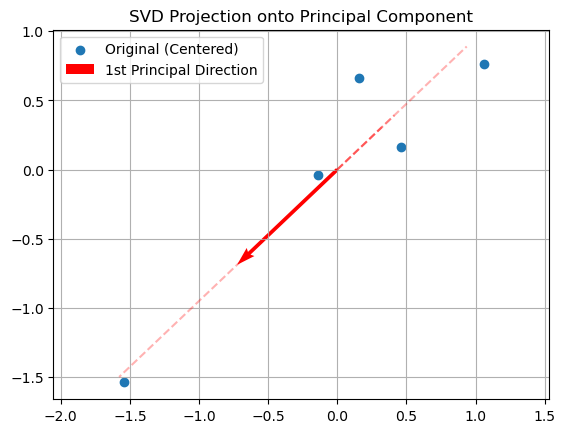

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Sample 2D dataset
X = np.array([[2.5, 2.4],
              [0.5, 0.7],
              [2.2, 2.9],
              [1.9, 2.2],
              [3.1, 3.0]])

# Step 1: Center the data
X_centered = X - np.mean(X, axis=0)

# Step 2: SVD
U, S, VT = np.linalg.svd(X_centered)

# First principal component (row of VT)
pc1 = VT[0]

# Project data onto first PC
X_proj = X_centered @ pc1

# Visualise
plt.scatter(X_centered[:, 0], X_centered[:, 1], label='Original (Centered)')
for proj in X_proj:
    projected = proj * pc1
    plt.plot([0, projected[0]], [0, projected[1]], 'r--', alpha=0.3)

plt.quiver(0, 0, *pc1, color='red', scale=1, angles='xy', scale_units='xy', label='1st Principal Direction')
plt.axis('equal')
plt.grid()
plt.legend()
plt.title('SVD Projection onto Principal Component')
plt.show()

## 13. Summary: Linear Algebra for Machine Learning

Linear algebra is the mathematical foundation of machine learning. This notebook covered:


### Fundamental Concepts
- Scalars, vectors, and matrices: core data structures
- Matrix operations: addition, multiplication, transpose
- Matrix transformations: how matrices rotate, scale, and shear vectors


### Deeper Operations
- Determinants: indicate invertibility and volume scaling
- Inverses: reverse transformations, critical for solving systems like the normal equation
- Solving systems: finding parameter solutions for models

### Optimisation & Learning
- Gradients: drive optimisation algorithms like gradient descent
- Symbolic derivatives: let us compute model updates analytically
- Loss surface visualisation: showed gradient direction and curvature

### Data Transformations
- Eigenvalues/eigenvectors: reveal intrinsic structure in data
- PCA: projects data into directions of maximum variance
- SVD: robust matrix factorisation used in dimensionality reduction and more

### Key Takeaways
- You don’t need to memorise matrix math — but understanding the concepts helps you reason about ML models.
- Vectors and matrices represent data and models.
- Gradients, eigenvectors, and decompositions help train, reduce, and interpret those models.
